In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import requests
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [84]:
dataset = pd.read_csv(r"C:\Users\asus\Desktop\mr datasets\Spotify_Song_Attributes(with api changes).csv")
dataset

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Unnamed: 22,Unnamed: 23
0,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.13,7.0,-17.719,1.0,0.0510,...,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827,4,NaN,NaN
1,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611,4,NaN,NaN
2,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509,4,NaN,NaN
3,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400,4,NaN,NaN
4,(L)only Child,salem ilese,2237969,alt z,0.645,0.611,8.0,-5.925,0.0,0.1370,...,157.475,audio_features,22lJaG2yxlSjIwdUIddcFk,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,Primadonna,MARINA,NaN,metropopolis,0.660,0.689,4.0,-2.671,0.0,0.0337,...,127.98,NaN,NaN,NaN,NaN,NaN,221075,4,NaN,NaN
4756,Lovesong - Remastered,The Cure,NaN,new wave,0.611,0.791,9.0,-7.700,0.0,0.0286,...,140.12,NaN,NaN,NaN,NaN,NaN,208267,4,NaN,NaN
4757,Girls,The Dare,NaN,Unknown,0.922,0.831,2.0,-1.918,1.0,0.2460,...,121.949,NaN,NaN,NaN,NaN,NaN,119559,4,NaN,NaN
4758,HOT TO GO!,Chappell Roan,NaN,indie pop,0.742,0.757,6.0,-4.981,1.0,0.0421,...,139.982,NaN,NaN,NaN,NaN,NaN,184841,4,NaN,NaN


In [85]:
exact_duplicates = dataset[dataset.duplicated()]
print(f"Number of exact duplicate rows: {len(exact_duplicates)}")
if len(exact_duplicates) > 0:
    print(exact_duplicates)

song_duplicates = dataset[dataset.duplicated(subset=['trackName', 'artistName'])]
print(f"Number of duplicate songs (same track + artist): {len(song_duplicates)}")

# Remove duplicates
dataset = dataset.drop_duplicates(subset=['trackName', 'artistName'])
print(f"Dataset size after removing song duplicates: {dataset.shape[0]}")

# MODIFIED: Reset index after removing duplicates - this is important
dataset = dataset.reset_index(drop=True)

# Reset index after removing duplicates - this is important
dataset = dataset.reset_index(drop=True)

# Check for null values
null_values = dataset.isnull().sum()    
print("Null values per column:")
print(null_values)

# Define features
features = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

# Handle null values if they exist
if null_values.sum() > 0:
    print("Found null values. Handling them...")
    critical_columns = ['trackName', 'artistName', 'genre'] + [f for f in features if f in dataset.columns]
    dataset = dataset.dropna(subset=critical_columns)
    dataset = dataset.reset_index(drop=True)  # Reset index again after dropping nulls
    print(f"Rows after dropping nulls in critical columns: {dataset.shape[0]}")
else:
    print("No null values found.")

Number of exact duplicate rows: 56
                                              trackName artistName msPlayed  \
805   ??????????????????????????????????????????????...        NaN      NaN   
806   ??????????????????????????????????????????????...        NaN      NaN   
807   ??????????????????????????????????????????????...        NaN      NaN   
808   ??????????????????????????????????????????????...        NaN      NaN   
813   ??????????????????????????????????????????????...        NaN      NaN   
814   ??????????????????????????????????????????????...        NaN      NaN   
816   ??????????????????????????????????????????????...        NaN      NaN   
818   ??????????????????????????????????????????????...        NaN      NaN   
819   ??????????????????????????????????????????????...        NaN      NaN   
820   ??????????????????????????????????????????????...        NaN      NaN   
821   ??????????????????????????????????????????????...        NaN      NaN   
823   ???????????

In [86]:

# Convert features to numeric
for feature in features:
    if feature in dataset.columns:
        dataset[feature] = pd.to_numeric(dataset[feature], errors='coerce')

# Drop rows with NaN values after conversion
dataset = dataset.dropna(subset=[f for f in features if f in dataset.columns])
dataset = dataset.reset_index(drop=True)  # Reset index again
print(f"Final dataset shape: {dataset.shape}")

# One-hot encode genres
from sklearn.preprocessing import OneHotEncoder
import joblib

encoder = OneHotEncoder(sparse_output=False)
genre_one_hot = encoder.fit_transform(dataset[['genre']])

# Convert to DataFrame
genre_one_hot_df = pd.DataFrame(genre_one_hot, 
                                columns=encoder.get_feature_names_out(['genre']))


Final dataset shape: (4624, 24)


In [87]:
features = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

print("\nChecking for non-numeric values in features:")
for feature in features:
    if feature in dataset.columns:
        # Check for non-numeric values
        non_numeric = dataset[feature].apply(lambda x: not isinstance(x, (int, float)) and not str(x).replace('.', '').replace('-', '').isdigit())
        if non_numeric.any():
            print(f"Non-numeric values in {feature}:")
            print(dataset[feature][non_numeric].unique())
    else:
        print(f"Column {feature} not found in dataset")

# Convert features to numeric, replacing any non-numeric values with NaN
for feature in features:
    if feature in dataset.columns:
        dataset[feature] = pd.to_numeric(dataset[feature], errors='coerce')

# Check for NaN values after conversion
print("\nNaN values after numeric conversion:")
print(dataset[features].isnull().sum())

# %%
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
genre_one_hot = encoder.fit_transform(dataset[['genre']])

# Convert to DataFrame with proper indexing
genre_one_hot_df = pd.DataFrame(genre_one_hot, 
                                columns=encoder.get_feature_names_out(['genre']),
                                index=dataset.index)  # FIXED: Match original dataset index

# Save as CSV
genre_one_hot_df.to_csv("genre_one_hot.csv", index=False)



Checking for non-numeric values in features:

NaN values after numeric conversion:
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64


Elbow Method for Audio Features:


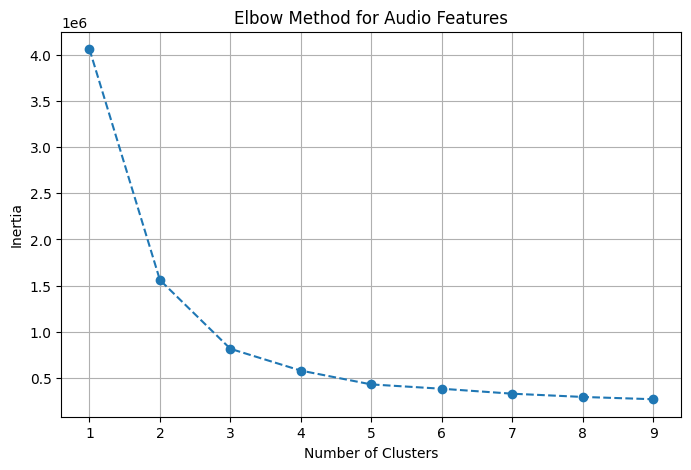

<Figure size 640x480 with 0 Axes>

In [88]:
# Elbow Method to determine optimal number of clusters
def elbow_method(data, cluster_range=range(1, 10), title="Elbow Method"):
    inertia = []
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, inertia, marker='o', linestyle='--')
    plt.title(title)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.xticks(cluster_range)
    plt.grid()
    plt.show()
    # FIXED: Save figure before showing
    plt.savefig('chart1.png')

# Apply the elbow method on audio features
print("Elbow Method for Audio Features:")
elbow_method(dataset[features], title="Elbow Method for Audio Features")


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import OneHotEncoder
import joblib

# Hierarchical clustering on genre features
hierarchical = AgglomerativeClustering(n_clusters=None, distance_threshold=9)
dataset['hierarchical_cluster'] = hierarchical.fit_predict(genre_one_hot)
joblib.dump(hierarchical, "hierarchical_model.pkl")

# Number of clusters formed
n_clusters = dataset['hierarchical_cluster'].nunique()
print(f"Number of clusters formed: {n_clusters}")

# Check if clustering is valid for scoring
if 2 <= n_clusters < len(dataset):
    # Calculate evaluation metrics
    silhouette = silhouette_score(genre_one_hot, dataset['hierarchical_cluster'])
    davies_bouldin = davies_bouldin_score(genre_one_hot, dataset['hierarchical_cluster'])
    calinski_harabasz = calinski_harabasz_score(genre_one_hot, dataset['hierarchical_cluster'])

    print("Silhouette Score for Genre Hierarchical Clustering:", silhouette)
    print("Davies-Bouldin Index for Genre Hierarchical Clustering:", davies_bouldin)
    print("Calinski-Harabasz Index for Genre Hierarchical Clustering:", calinski_harabasz)
else:
    print(f"Invalid number of clusters ({n_clusters}) for scoring.")


Number of clusters formed: 25
Silhouette Score for Genre Hierarchical Clustering: 0.4526348379252139
Davies-Bouldin Index for Genre Hierarchical Clustering: 0.9941212008835011
Calinski-Harabasz Index for Genre Hierarchical Clustering: 152.31260363667712


In [ ]:
kmeans_audio = KMeans(n_clusters=4, init="k-means++", random_state=42)
dataset['audio_cluster'] = kmeans_audio.fit_predict(dataset[features])
joblib.dump(kmeans_audio, "kmeans_audio_model.pkl")

# Calculate metrics for audio clustering
silhouette = silhouette_score(dataset[features], kmeans_audio.labels_)
davies_bouldin = davies_bouldin_score(dataset[features], kmeans_audio.labels_)
calinski_harabasz = calinski_harabasz_score(dataset[features], kmeans_audio.labels_)

print("Davies-Bouldin Index for audio features:", davies_bouldin)
print("Calinski-Harabasz Index for audio features:", calinski_harabasz)
print("Silhouette Score for audio features:", silhouette)
dataset.head()

Davies-Bouldin Index for audio features: 0.7010056039247133
Calinski-Harabasz Index for audio features: 9254.703658870852
Silhouette Score for audio features: 0.4294061006520281


,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,Unnamed: 22,Unnamed: 23,hierarchical_cluster,audio_cluster
0,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827,4,NaN,NaN,0,3
1,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611,4,NaN,NaN,0,1
2,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509,4,NaN,NaN,0,3
3,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400,4,NaN,NaN,0,3
4,(L)only Child,salem ilese,2237969,alt z,0.645,0.611,8.0,-5.925,0.0,0.1370,...,22lJaG2yxlSjIwdUIddcFk,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468,3,NaN,NaN,11,2


In [ ]:
scaler_genre = StandardScaler()
scaled_genre = scaler_genre.fit_transform(genre_one_hot)

scaler_audio = StandardScaler()
scaled_audio = scaler_audio.fit_transform(dataset[features])

# Weight features for clustering (genre and audio only)
weighted_genre = scaled_genre * 0.67  # 40/60 = 0.67
weighted_audio = scaled_audio * 0.67  # 40/60 = 0.67

# Combine features for clustering
combined_features = np.hstack((weighted_genre, weighted_audio))


Number of combined clusters formed: 100


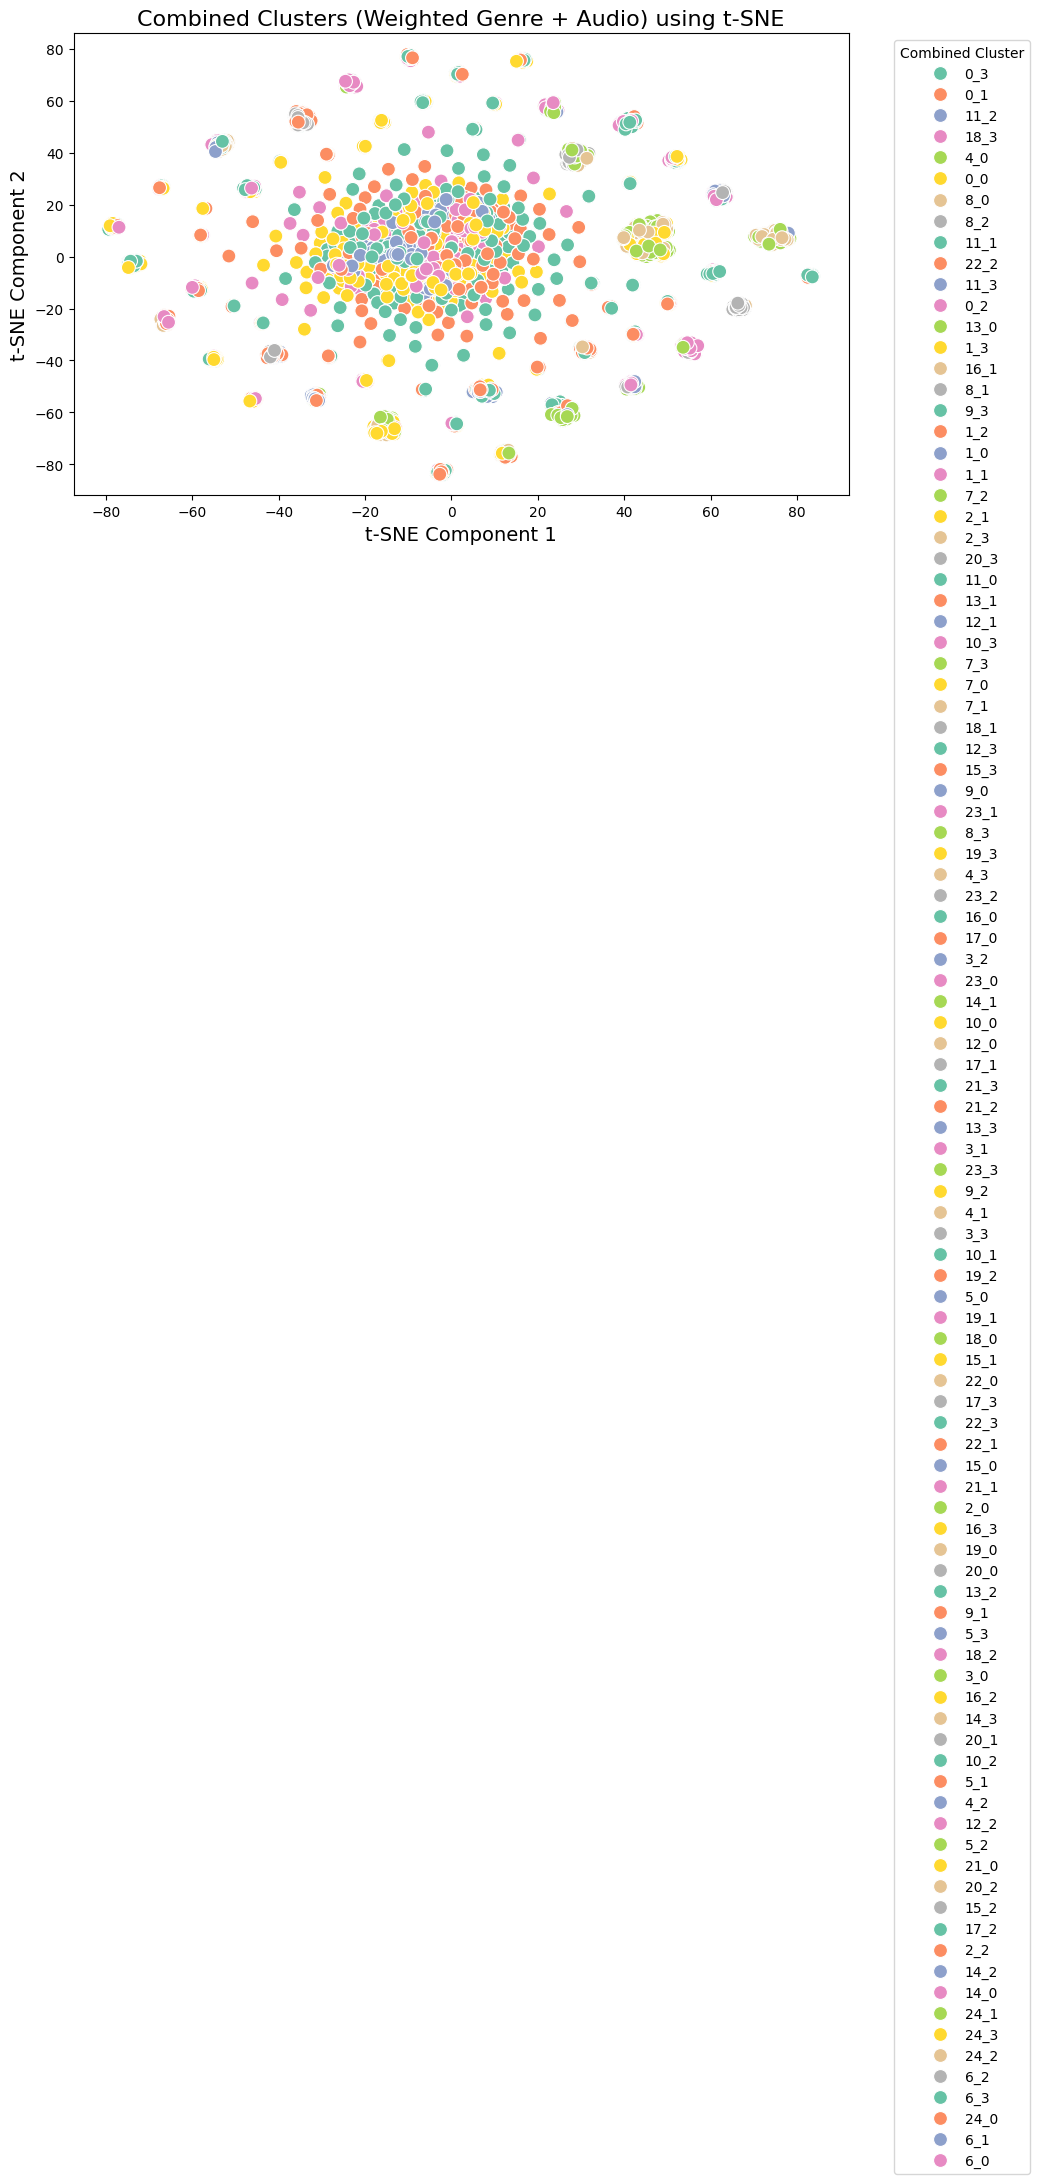

['C:\\Users\\asus\\Desktop\\models\\encoder.pkl']

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import joblib

# Create combined cluster labels
dataset['combined_cluster'] = dataset['hierarchical_cluster'].astype(str) + '_' + dataset['audio_cluster'].astype(str)
dataset.to_csv('Spotify_Song_Attributes_with_clusters.csv', index=False)

# Check combined clusters
n_combined_clusters = dataset['combined_cluster'].nunique()
print(f"Number of combined clusters formed: {n_combined_clusters}")

# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42)
reduced_features = tsne.fit_transform(combined_features)

# Create DataFrame for plotting
tsne_df = pd.DataFrame(reduced_features, columns=['tSNE Component 1', 'tSNE Component 2'])
tsne_df['combined_cluster'] = dataset['combined_cluster'].values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='tSNE Component 1', y='tSNE Component 2',
                hue='combined_cluster', palette='Set2', s=100, marker='o')
plt.title("Combined Clusters (Weighted Genre + Audio) using t-SNE", fontsize=16)
plt.xlabel("t-SNE Component 1", fontsize=14)
plt.ylabel("t-SNE Component 2", fontsize=14)
plt.legend(title='Combined Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Save combined features and model
np.save(r"C:\Users\asus\Desktop\models\combined_features.npy", combined_features)
nn_combined = NearestNeighbors(metric="cosine")
nn_combined.fit(combined_features)
joblib.dump(nn_combined, r"C:\Users\asus\Desktop\models\nn_combined_model.pkl")

# Save scalers and encoders
joblib.dump(scaler_genre, r"C:\Users\asus\Desktop\models\scaler_genre.pkl")
joblib.dump(scaler_audio, r"C:\Users\asus\Desktop\models\scaler_audio.pkl")
joblib.dump(encoder, r"C:\Users\asus\Desktop\models\encoder.pkl")


In [106]:
def get_recommendations(song_name, dataset, combined_features, n_recommendations=15):
    """Get song recommendations using weighted similarity (40% audio, 40% genre, 20% artist)"""
    
    # Find the song
    song_matches = dataset[dataset['trackName'] == song_name]
    
    if len(song_matches) == 0:
        print(f"Song '{song_name}' not found")
        return
    
    # Use first match if multiple exist
    song_idx = song_matches.index[0]
    song_cluster = dataset.loc[song_idx, 'combined_cluster']
    song_artist = dataset.loc[song_idx, 'artistName']
    
    print(f"Finding recommendations for '{song_name}' by {song_artist} in cluster {song_cluster}")
    
    # Get all songs in same cluster
    cluster_songs = dataset[dataset['combined_cluster'] == song_cluster].copy()
    
    # Remove duplicates by track name and artist
    cluster_songs = cluster_songs.drop_duplicates(subset=['trackName', 'artistName'])
    
    # Remove the input song itself
    cluster_songs = cluster_songs[cluster_songs.index != song_idx]
    
    if len(cluster_songs) == 0:
        print("No other songs found in this cluster")
        return
    
    # Get feature vectors for cluster songs
    cluster_indices = cluster_songs.index.tolist()
    cluster_features = combined_features[cluster_indices]
    song_features = combined_features[song_idx].reshape(1, -1)
    
    # Calculate audio+genre similarity (80% of total)
    from sklearn.metrics.pairwise import cosine_similarity
    content_similarity = cosine_similarity(song_features, cluster_features)[0]
    
    # Calculate artist similarity (20% of total)
    artist_similarity = np.array([1.0 if dataset.loc[idx, 'artistName'] == song_artist else 0.0 
                                 for idx in cluster_indices])
    
    # Combine similarities with weights
    final_similarity = (content_similarity * 0.8) + (artist_similarity * 0.2)
    
    # Get top recommendations
    top_indices = np.argsort(final_similarity)[::-1][:n_recommendations]
    
    print(f"\nTop {len(top_indices)} recommendations:")
    for i, idx in enumerate(top_indices):
        song_data = cluster_songs.iloc[idx]
        similarity = final_similarity[idx]
        artist_match = " (Same Artist)" if song_data['artistName'] == song_artist else ""
        print(f"{i+1}. {song_data['trackName']} by {song_data['artistName']} (similarity: {similarity:.3f}){artist_match}")

# Test the recommendation function
get_recommendations(song_name="Last Friday Night (T.G.I.F.)", dataset=dataset, combined_features=combined_features, n_recommendations=15)

Finding recommendations for 'Last Friday Night (T.G.I.F.)' by Katy Perry in cluster 1_1

Top 15 recommendations:
1. The One That Got Away by Katy Perry (similarity: 0.866) (Same Artist)
2. I Kissed A Girl by Katy Perry (similarity: 0.813) (Same Artist)
3. Harleys In Hawaii by Katy Perry (similarity: 0.797) (Same Artist)
4. Dark Horse by Katy Perry (similarity: 0.795) (Same Artist)
5. Mine by Bazzi (similarity: 0.738)
6. hot girl bummer by blackbear (similarity: 0.737)
7. i dont love me by blackbear (similarity: 0.732)
8. Fantasy by Bazzi (similarity: 0.721)
9. I feel bad by blackbear (similarity: 0.715)
10. Bad Habits by Ed Sheeran (similarity: 0.700)
11. Nobody's Perfect by Hannah Montana (similarity: 0.699)
12. Kings & Queens, Pt. 2 (feat. Lauv & Saweetie) by Ava Max (similarity: 0.698)
13. Believed by Lauv (similarity: 0.695)
14. Moves Like Jagger - Studio Recording From "The Voice" Performance by Maroon 5 (similarity: 0.691)
15. Let It Go by Demi Lovato (similarity: 0.686)


In [100]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

def get_artist_recommendations(song_name, dataset, combined_features, n_recommendations=15, 
                             artist_weight=0.3, same_artist_boost=0.2):
    """
    Get recommendations considering artist similarity
    
    artist_weight: how much to weight artist similarity vs audio/genre features
    same_artist_boost: extra boost for songs by same artist
    """
    
    # Find the song
    song_matches = dataset[dataset['trackName'] == song_name]
    
    if len(song_matches) == 0:
        print(f"Song '{song_name}' not found")
        return
    
    song_idx = song_matches.index[0]
    song_data = dataset.loc[song_idx]
    input_artist = song_data['artistName']
    
    print(f"Finding recommendations for '{song_name}' by {input_artist}")
    
    # Get all songs except the input song
    candidates = dataset[dataset.index != song_idx].copy()
    
    # Remove duplicates
    candidates = candidates.drop_duplicates(subset=['trackName', 'artistName'])
    
    if len(candidates) == 0:
        print("No candidate songs found")
        return
    
    # Calculate audio/genre similarity
    candidate_indices = candidates.index.tolist()
    candidate_features = combined_features[candidate_indices]
    song_features = combined_features[song_idx].reshape(1, -1)
    
    audio_similarities = cosine_similarity(song_features, candidate_features)[0]
    
    # Calculate artist similarity using different methods
    artist_similarities = calculate_artist_similarity(input_artist, candidates, dataset)
    
    # Combine similarities
    final_scores = []
    
    for i, (idx, candidate) in enumerate(candidates.iterrows()):
        audio_sim = audio_similarities[i]
        artist_sim = artist_similarities[i]
        
        # Same artist gets extra boost
        if candidate['artistName'] == input_artist:
            artist_sim += same_artist_boost
        
        # Weighted combination
        final_score = (1 - artist_weight) * audio_sim + artist_weight * artist_sim
        final_scores.append(final_score)
    
    # Get top recommendations
    top_indices = np.argsort(final_scores)[::-1][:n_recommendations]
    
    print(f"\nTop {len(top_indices)} recommendations:")
    for i, idx in enumerate(top_indices):
        candidate = candidates.iloc[idx]
        audio_sim = audio_similarities[idx]
        artist_sim = artist_similarities[idx]
        final_score = final_scores[idx]
        
        same_artist_flag = " (same artist)" if candidate['artistName'] == input_artist else ""
        
        print(f"{i+1}. {candidate['trackName']} by {candidate['artistName']}{same_artist_flag}")
        print(f"    Audio similarity: {audio_sim:.3f} | Artist similarity: {artist_sim:.3f} | Final score: {final_score:.3f}")

def calculate_artist_similarity(input_artist, candidates, dataset):
    """Calculate artist similarity using multiple approaches"""
    
    # Method 1: Artist collaboration frequency
    collaboration_scores = get_collaboration_similarity(input_artist, candidates, dataset)
    
    # Method 2: Genre overlap between artists
    genre_overlap_scores = get_artist_genre_similarity(input_artist, candidates, dataset)
    
    # Method 3: Simple string similarity for similar artist names
    name_similarity_scores = get_artist_name_similarity(input_artist, candidates)
    
    # Combine different artist similarity methods
    artist_similarities = []
    for i in range(len(candidates)):
        # Weighted combination of different artist similarity methods
        combined_score = (0.4 * collaboration_scores[i] + 
                         0.4 * genre_overlap_scores[i] + 
                         0.2 * name_similarity_scores[i])
        artist_similarities.append(combined_score)
    
    return artist_similarities

def get_collaboration_similarity(input_artist, candidates, dataset):
    """Score based on how often artists appear together in playlists/similar contexts"""
    
    # Get all songs by the input artist
    input_artist_songs = dataset[dataset['artistName'] == input_artist]
    input_genres = set()
    
    # Collect genres from input artist's songs
    for _, song in input_artist_songs.iterrows():
        # Assuming you have genre columns or a genre field
        # This is a simplified version - adapt to your actual genre structure
        if 'genre' in song and pd.notna(song['genre']):
            input_genres.update(song['genre'].split(','))
    
    collaboration_scores = []
    
    for _, candidate in candidates.iterrows():
        candidate_artist = candidate['artistName']
        
        # Same artist gets maximum score
        if candidate_artist == input_artist:
            collaboration_scores.append(1.0)
            continue
        
        # Check if artists have collaborated (simplified)
        # You might have better collaboration data
        collaboration_count = len(dataset[
            (dataset['artistName'] == input_artist) & 
            (dataset['artistName'].str.contains(candidate_artist, na=False))
        ])
        
        # Normalize collaboration score
        collaboration_score = min(collaboration_count / 5.0, 1.0)  # Cap at 1.0
        collaboration_scores.append(collaboration_score)
    
    return collaboration_scores

def get_artist_genre_similarity(input_artist, candidates, dataset):
    """Score based on genre overlap between artists"""
    
    # Get genres for input artist
    input_artist_songs = dataset[dataset['artistName'] == input_artist]
    
    # Create genre profile for input artist
    input_genre_profile = create_artist_genre_profile(input_artist_songs)
    
    genre_scores = []
    
    for _, candidate in candidates.iterrows():
        candidate_artist = candidate['artistName']
        
        # Same artist gets high score
        if candidate_artist == input_artist:
            genre_scores.append(0.8)  # High but not perfect to allow for variety
            continue
        
        # Get candidate artist's songs
        candidate_songs = dataset[dataset['artistName'] == candidate_artist]
        candidate_genre_profile = create_artist_genre_profile(candidate_songs)
        
        # Calculate genre overlap
        if len(input_genre_profile) == 0 or len(candidate_genre_profile) == 0:
            genre_scores.append(0.0)
            continue
        
        # Simple genre overlap calculation
        common_genres = set(input_genre_profile.keys()) & set(candidate_genre_profile.keys())
        total_genres = set(input_genre_profile.keys()) | set(candidate_genre_profile.keys())
        
        overlap_score = len(common_genres) / len(total_genres) if total_genres else 0
        genre_scores.append(overlap_score)
    
    return genre_scores

def create_artist_genre_profile(artist_songs):
    """Create a genre profile for an artist based on their songs"""
    genre_profile = defaultdict(int)
    
    for _, song in artist_songs.iterrows():
        # This assumes you have genre information
        # Adapt based on your actual data structure
        if 'genre' in song and pd.notna(song['genre']):
            genres = song['genre'].split(',')
            for genre in genres:
                genre_profile[genre.strip()] += 1
    
    return dict(genre_profile)

def get_artist_name_similarity(input_artist, candidates):
    """Simple string similarity for artist names"""
    
    # Use TF-IDF for artist name similarity
    all_artists = [input_artist] + candidates['artistName'].tolist()
    
    try:
        tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2, 3))
        tfidf_matrix = tfidf.fit_transform(all_artists)
        
        # Calculate similarity with input artist (first in list)
        similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:])
        return similarities[0].tolist()
    except:
        # Fallback to simple string matching
        name_scores = []
        for _, candidate in candidates.iterrows():
            # Simple substring matching
            if input_artist.lower() in candidate['artistName'].lower():
                name_scores.append(0.5)
            else:
                name_scores.append(0.0)
        return name_scores

# Alternative simpler approach focusing on same artist + audio similarity
def get_simple_artist_recommendations(song_name, dataset, combined_features, n_recommendations=15):
    """Simpler approach: prioritize same artist, then audio similarity"""
    
    song_matches = dataset[dataset['trackName'] == song_name]
    
    if len(song_matches) == 0:
        print(f"Song '{song_name}' not found")
        return
    
    song_idx = song_matches.index[0]
    song_data = dataset.loc[song_idx]
    input_artist = song_data['artistName']
    
    print(f"Finding recommendations for '{song_name}' by {input_artist}")
    
    # Get candidates
    candidates = dataset[dataset.index != song_idx].copy()
    candidates = candidates.drop_duplicates(subset=['trackName', 'artistName'])
    
    # Split into same artist and different artist
    same_artist_songs = candidates[candidates['artistName'] == input_artist]
    different_artist_songs = candidates[candidates['artistName'] != input_artist]
    
    # Calculate audio similarities
    song_features = combined_features[song_idx].reshape(1, -1)
    
    recommendations = []
    
    # Get recommendations from same artist first
    if len(same_artist_songs) > 0:
        same_artist_indices = same_artist_songs.index.tolist()
        same_artist_features = combined_features[same_artist_indices]
        same_artist_sims = cosine_similarity(song_features, same_artist_features)[0]
        
        # Add top same-artist recommendations
        top_same_artist = np.argsort(same_artist_sims)[::-1][:min(5, len(same_artist_songs))]
        
        for idx in top_same_artist:
            song_data = same_artist_songs.iloc[idx]
            recommendations.append({
                'song': song_data,
                'similarity': same_artist_sims[idx],
                'type': 'same_artist'
            })
    
    # Fill remaining slots with different artists
    remaining_slots = n_recommendations - len(recommendations)
    
    if remaining_slots > 0 and len(different_artist_songs) > 0:
        different_artist_indices = different_artist_songs.index.tolist()
        different_artist_features = combined_features[different_artist_indices]
        different_artist_sims = cosine_similarity(song_features, different_artist_features)[0]
        
        top_different_artist = np.argsort(different_artist_sims)[::-1][:remaining_slots]
        
        for idx in top_different_artist:
            song_data = different_artist_songs.iloc[idx]
            recommendations.append({
                'song': song_data,
                'similarity': different_artist_sims[idx],
                'type': 'different_artist'
            })
    
    # Display recommendations
    print(f"\nTop {len(recommendations)} recommendations:")
    for i, rec in enumerate(recommendations):
        song = rec['song']
        sim = rec['similarity']
        rec_type = rec['type']
        
        type_flag = " (same artist)" if rec_type == 'same_artist' else ""
        print(f"{i+1}. {song['trackName']} by {song['artistName']}{type_flag}")
        print(f"    Similarity: {sim:.3f}")

# Example usage
print("=== Artist-Aware Recommendations ===")
get_artist_recommendations("Yeah, I Said It", dataset, combined_features, n_recommendations=15)

print("\n=== Simple Artist-Focused Recommendations ===")
get_simple_artist_recommendations("Yeah, I Said It", dataset, combined_features, n_recommendations=15)

=== Artist-Aware Recommendations ===
Finding recommendations for 'Yeah, I Said It' by Rihanna


error: multiple repeat at position 8

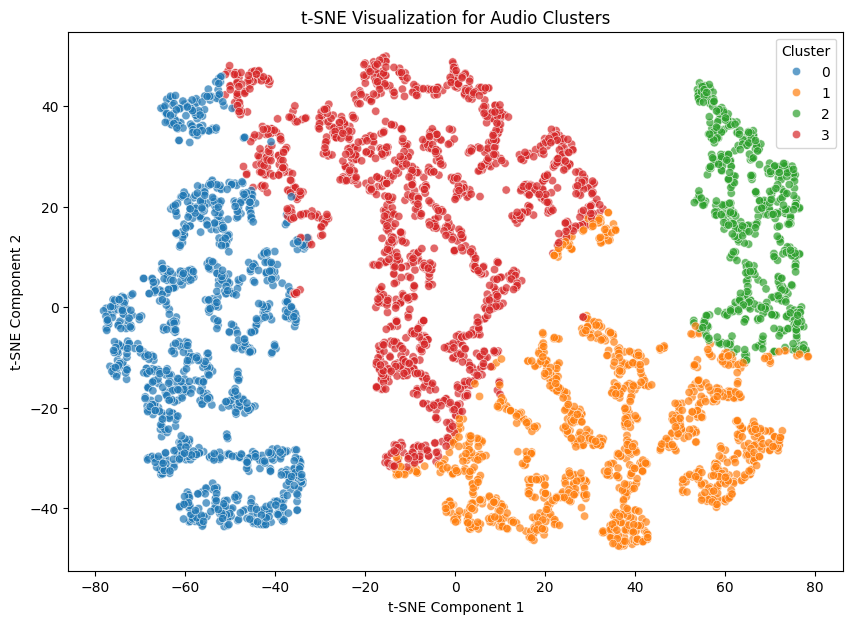

In [81]:
from sklearn.manifold import TSNE
import seaborn as sns


# T-SNE for audio clusters
tsne_audio = TSNE(n_components=2, random_state=42)
audio_tsne = tsne_audio.fit_transform(dataset[features])

# Plotting function
def plot_tsne(tsne_data, cluster_column, title):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=dataset[cluster_column], palette='tab10', alpha=0.7)
    plt.title(title)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.legend(title="Cluster")
    plt.show()

# Plot T-SNE results
plot_tsne(audio_tsne, cluster_column='audio_cluster', title="t-SNE Visualization for Audio Clusters")



Shape of genre_encoded_scaled: (4624, 535)


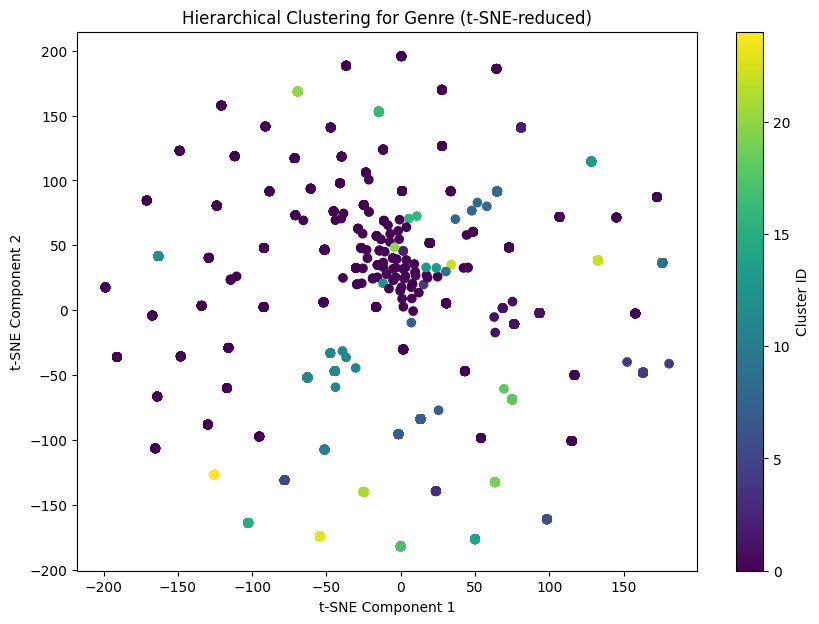

In [101]:
from sklearn.manifold import TSNE
print("Shape of genre_encoded_scaled:", genre_one_hot.shape)

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2)
genre_tsne = tsne.fit_transform(genre_one_hot)

# Plot the t-SNE reduced data
plt.figure(figsize=(10, 7))
plt.scatter(genre_tsne[:, 0], genre_tsne[:, 1], c=dataset['hierarchical_cluster'], cmap='viridis', marker='o')
plt.title('Hierarchical Clustering for Genre (t-SNE-reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster ID')
plt.show()


In [ ]:
###################################################################################################################################################################################
#ignore the below 
##############################################################################################################################################################################################

In [51]:
# View unique values in the 'genre' column
unique_genres = dataset['genre'].value_counts()

# Print the unique genres
print(unique_genres)
 

genre
pop                   347
alt z                 337
filmi                 206
dance pop              94
art pop                93
                     ... 
egyptian pop            1
japanese vgm            1
american orchestra      1
syrian hip hop          1
arab groove             1
Name: count, Length: 540, dtype: int64


In [52]:
from sklearn.neighbors import NearestNeighbors

def get_recommendations(song_name, dataset, genre_one_hot, audio_features, n_recommendations=5):
    """
    Generate 10 recommendations: 5 based on genre clustering and 5 based on audio feature clustering.

    Parameters:
    - song_name: Name of the song to base recommendations on.
    - dataset: The dataset containing song information.
    - genre_one_hot: One-hot encoded genre data.
    - audio_features: DataFrame of audio features used for clustering.
    - n_recommendations: Number of recommendations for each type (default is 5).
    """

    # Find the song index based on the song name
    song_index = dataset[dataset['trackName'] == song_name].index

    # Ensure the song exists in the dataset
    if len(song_index) == 0:
        print(f"Song '{song_name}' not found in the dataset.")
        return

    song_index = song_index[0]

    # Extract the genre cluster for the input song
    genre_cluster = dataset.loc[song_index, 'hierarchical_cluster']

    # Extract the audio cluster for the input song
    audio_cluster = dataset.loc[song_index, 'audio_cluster']

    # Get songs in the same genre cluster
    genre_cluster_songs = dataset[dataset['hierarchical_cluster'] == genre_cluster]

    # Nearest Neighbors for genre
    nn_genre = NearestNeighbors(n_neighbors=n_recommendations + 1, metric='cosine')
    nn_genre.fit(genre_one_hot[genre_cluster_songs.index])
    genre_distances, genre_indices = nn_genre.kneighbors(genre_one_hot[song_index].reshape(1, -1))

    # Get the genre-based recommendations (excluding the song itself)
    genre_recommendations = genre_cluster_songs.iloc[genre_indices[0][1:]]

    # Get songs in the same audio cluster
    audio_cluster_songs = dataset[dataset['audio_cluster'] == audio_cluster]

    # Nearest Neighbors for audio features
    nn_audio = NearestNeighbors(n_neighbors=n_recommendations + 1, metric='cosine')
    nn_audio.fit(audio_features.loc[audio_cluster_songs.index])
    audio_distances, audio_indices = nn_audio.kneighbors(audio_features.loc[song_index].values.reshape(1, -1))

    # Get the audio-based recommendations (excluding the song itself)
    audio_recommendations = audio_cluster_songs.iloc[audio_indices[0][1:]]

    # Combine recommendations
    print(f"\nRecommendations for '{song_name}':")

    print("\nGenre-Based Recommendations:")
    for idx, song in genre_recommendations.iterrows():
        print(f"- {song['trackName']} by {song['artistName']} (Genre: {song['genre']})")

    print("\nAudio-Based Recommendations:")
    for idx, song in audio_recommendations.iterrows():
        print(f"- {song['trackName']} by {song['artistName']} (Audio Cluster: {song['audio_cluster']})")

# Example usage (assuming 'track_name' and 'artist_name' columns exist)
get_recommendations(song_name="Less Than Zero", dataset=dataset, genre_one_hot=genre_one_hot, audio_features=dataset[features])



Recommendations for 'Less Than Zero':

Genre-Based Recommendations:
- Less Than Zero by The Weeknd (Genre: canadian contemporary r&b)
- Popular (with Playboi Carti & Madonna) - From The Idol Vol. 1 (Music from the HBO Original Series) by The Weeknd, Playboi Carti, Madonna (Genre: canadian contemporary r&b)
- Die For You by The Weeknd (Genre: canadian contemporary r&b)
- In Your Eyes by The Weeknd (Genre: canadian contemporary r&b)
- Is There Someone Else? by The Weeknd (Genre: canadian contemporary r&b)

Audio-Based Recommendations:
- Less Than Zero by The Weeknd (Audio Cluster: 1)
- Can I Have This Dance by High School Musical Cast (Audio Cluster: 1)
- Scatta (feat. Foreign Beggars & Bare Noize) by Skrillex (Audio Cluster: 1)
- Shine A Light by BANNERS (Audio Cluster: 1)
- Come & Go (with Marshmello) by Juice WRLD (Audio Cluster: 1)


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
